<ipython-input-21-eff75a301b01>:26: RuntimeWarning: divide by zero encountered in log
  magnitude3 = 20*np.log(np.abs(fshift))
<ipython-input-21-eff75a301b01>:28: RuntimeWarning: divide by zero encountered in log
  magnitude4 = 20*np.log(np.abs(f_ishift))


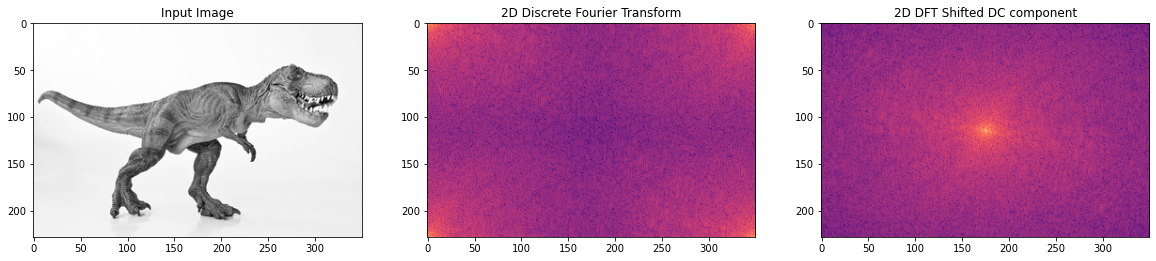

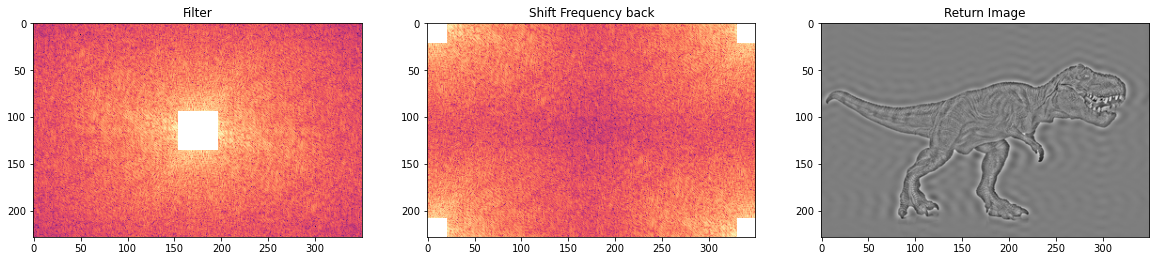

In [21]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Open an image and show
path = r'../images/trex.png'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude1 = 20*np.log(np.abs(f))
magnitude2 = 20*np.log(np.abs(fshift))

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].set(title='Input Image')
ax[0].imshow(image, cmap='gray')
ax[1].set(title='2D Discrete Fourier Transform')
ax[1].imshow(magnitude1, cmap='magma')
ax[2].set(title='2D DFT Shifted DC component')
ax[2].imshow(magnitude2, cmap='magma')

rows, cols = image.shape
crow,ccol = rows//2 , cols//2
fshift[crow-20:crow+21, ccol-20:ccol+21] = 0
magnitude3 = 20*np.log(np.abs(fshift))
f_ishift = np.fft.ifftshift(fshift)
magnitude4 = 20*np.log(np.abs(f_ishift))
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)

fig2, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].set(title='Filter')
ax[0].imshow(magnitude3, cmap='magma')
ax[1].set(title='Shift Frequency back')
ax[1].imshow(magnitude4, cmap='magma')
ax[2].set(title='Return Image')
ax[2].imshow(img_back, cmap='gray')